In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import exp as ē
from numpy import sqrt
from numpy.linalg import inv
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm

Set random seed

In [3]:
np.random.seed(42)
Զπ = 2*np.pi

Parameters

In [4]:
μ = np.array([[3], [2]])
Σ = np.array([[1, 1], [1, 2]])
Σˉᣳ = inv(Σ)

In [5]:
def conditional_gaussian(μ, Σ, xշ):
    μₐ = μ[0, 0]
    μᵦ = μ[1, 0]
    Σₐₐ = Σ[0, 0]
    Σᵦᵦ = Σ[1, 1]
    Σₐᵦ = Σᵦₐ = Σ[0, 1]
    Σᵦᵦˉᣳ = 1 / Σᵦᵦ
    μₐӏᵦ = μₐ + Σₐᵦ * Σᵦᵦˉᣳ * (xշ - μᵦ)
    Σₐӏᵦ = Σₐₐ - Σₐᵦ * Σᵦᵦˉᣳ * Σᵦₐ
    σ = sqrt(Σₐӏᵦ)
    return np.random.normal(μₐӏᵦ, σ)

In [6]:
def gibbs_sampling(n):
    samples = np.zeros((n, 2))
    xₗ, xշ = 3, 2
    for i in range(n):
        xₗ = conditional_gaussian(μ, Σ, xշ)
        xշ = conditional_gaussian(μ[::-1], Σ[::-1, ::-1], xₗ)
        samples[i] = [xₗ, xշ]
    return samples

Generate samples

In [7]:
n_samples = 20000
samples_gibbs = gibbs_sampling(n_samples)

Compute sample mean and covariance

In [8]:
μᵍ = np.mean(samples_gibbs, axis=0)
Σᵍ = np.cov(samples_gibbs, rowvar=False)
print(μᵍ)
print(Σᵍ)

[2.99536596 1.99161737]
[[0.99423948 0.99723512]
 [0.99723512 1.98567818]]


Plot results

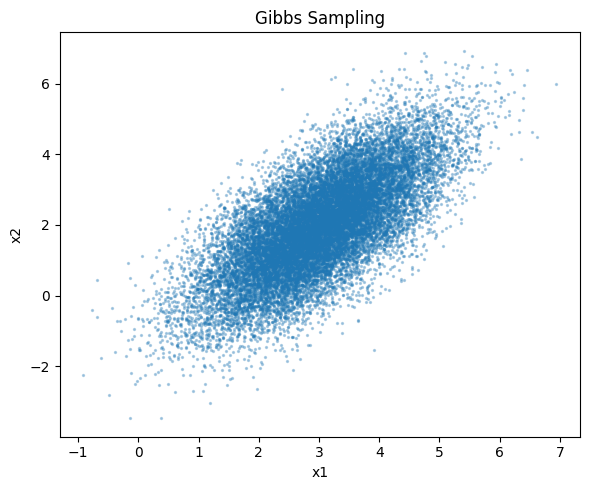

In [9]:
plt.figure(figsize=(6, 5))
plt.scatter(samples_gibbs[:, 0], samples_gibbs[:, 1], alpha=0.3, s=2)
plt.title("Gibbs Sampling")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()
plt.show()